1. Step and Load Data

1.1 Install Dependencies and Setup 

In [15]:
!pip install opencv-python matplotlib tensorflow zipfile36 
# download image dataset from google extension: 
# https://chrome.google.com/webstore/detail/download-all-images/ifipmflagepipjokmbdecpmjbibjnakm?hl=en


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Note: no need for tensorflow-gpu as it is same as tensorflow suince version 2.1 

In [16]:
!pip list # check if tensorflow is installed

Package                      Version


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



---------------------------- ---------
absl-py                      1.4.0
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.0
certifi                      2022.12.7
charset-normalizer           3.0.1
colorama                     0.4.6
comm                         0.1.2
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.6.6
decorator                    5.1.1
executing                    1.2.0
flatbuffers                  23.1.21
fonttools                    4.38.0
gast                         0.4.0
google-auth                  2.16.1
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.51.1
h5py                         3.8.0
idna                         3.4
ipykernel                    6.21.1
ipython                      8.10.0
jax                          0.4.4
jedi                         0.18.2
jobl

In [18]:
import tensorflow as tf
import os

In [19]:
# Use of os package in the project
# os.path.join('data','happy')
# os.listdir('data')

1.2 Remove dodgy images

In [20]:
# Avoid OOM errors by setting GPU Memory Consumption Growth 
gpus = tf.config.experimental.list_physical_devices('GPU') # list of all gpus
for gpu in gpus: # for each gpu
    tf.config.experimental.set_memory_growth(gpu, True) # set memory growth to true for each gpu (which limits the memory growth or handles memory erros)

In [21]:
# checks file validity
import cv2
import imghdr
from matplotlib import pyplot as plt

C:\Users\Pujan\AppData\Local\Temp\ipykernel_26616\1103399043.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [22]:
data_dir = 'sample_data'
#all files in data_dir
os.listdir(data_dir)
#all files in happy_ppl folder
os.listdir(os.path.join(data_dir, 'happy_ppl'))
# get numpy array of 1 files in happy_ppl folder
img = cv2.imread(os.path.join(data_dir, 'happy_ppl', 'Photo-happy-1-unsplash-michael-dam.jpg')) 
print('shape: ',img.shape) # (height, wide, RGB if 3)
image_exts = ['jpg', 'jpeg', 'png', 'bmp']

shape:  (3408, 3744, 3)


[[[ 78  77  81]
  [ 78  77  81]
  [ 79  78  82]
  ...
  [ 97  99 109]
  [100 102 112]
  [104 106 116]]

 [[ 71  70  74]
  [ 72  71  75]
  [ 75  74  78]
  ...
  [ 99 101 111]
  [100 102 112]
  [101 103 113]]

 [[ 72  71  75]
  [ 73  72  76]
  [ 76  75  79]
  ...
  [101 103 113]
  [ 99 101 111]
  [ 96  98 108]]

 ...

 [[ 91  86  87]
  [ 94  89  90]
  [ 98  93  94]
  ...
  [101  99  99]
  [102 100 100]
  [103 101 101]]

 [[ 92  87  88]
  [ 94  89  90]
  [ 96  91  92]
  ...
  [101  99  99]
  [100  98  98]
  [ 99  97  97]]

 [[ 93  88  89]
  [ 94  89  90]
  [ 93  88  89]
  ...
  [100  98  98]
  [ 98  96  96]
  [ 96  94  94]]]


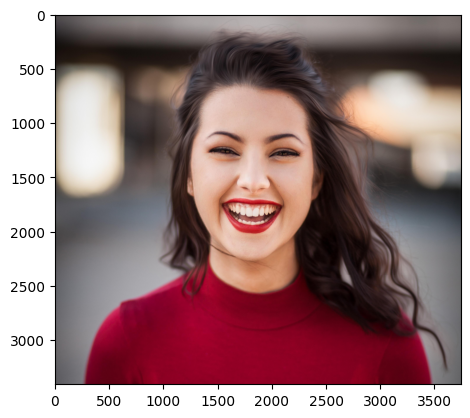

In [23]:
img = cv2.imread('sample_data/happy_ppl/Photo-happy-1-unsplash-michael-dam.jpg') 
print(img)
#plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [24]:
# def remove_dodgy_img(): # remove images that are not in the image_exts list
for img_class in os.listdir(data_dir): # all classes
    tot_imgs = []
    for image in os.listdir(os.path.join(data_dir, img_class)): # all class files
        image_path = os.path.join(data_dir, img_class, image) # all images
        try:
            img = cv2.imread(image_path) # read image and convert it to numpy array
            tip = imghdr.what(image_path) # check image type
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path) # remove image
        except Exception as e:
            print('Error in image {}'.format(image_path))
            # os.remove(image_path)
        tot_imgs.append(image_path)
    print("class: ", img_class, ' has ', len(tot_imgs), 'imgs')

class:  happy_ppl  has  443 imgs
class:  sad_ppl  has  123 imgs


1.3 Load Data

In [25]:
#tf.data.Dataset?? # api for loading images from a folder (scales well and provides pipeline framwork)
#tf.keras.utils.image_dataset_from_directory?? # for loading images from a folder
# tf.data.Dataset.list_files('sample_data/*/*.jpg') # list all files in the folder
import numpy as np

In [26]:
data = tf.keras.utils.image_dataset_from_directory('sample_data' # create dataset from directory
                                                #    , batch_size=8 # batch size
                                                #    , image_size=(128,128) # image size
                                                #    , label_mode='categorical' # categorical or binary)
)
data #batch size, image size, class names but cannot be indexed

Found 566 files belonging to 2 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
data_iterator = data.as_numpy_iterator() # convert to numpy iterator
data_iterator # help to loop through the dataset

In [28]:
# Get next batch from the iterator
batch = data_iterator.next() # get next batch
batch # tuple of (images, labels) 
# images.shape = (32, 256, 256, 3) # 32 images, 256x256 pixels, 3 channels (RGB)

(array([[[[ 97.55859  , 126.14502  , 154.67627  ],
          [ 87.58447  , 116.84839  , 144.64697  ],
          [117.763916 , 143.55542  , 170.65967  ],
          ...,
          [ 80.65796  ,  52.819336 ,  57.486084 ],
          [ 92.64307  ,  65.64307  ,  71.149414 ],
          [ 75.362305 ,  48.920654 ,  52.65503  ]],
 
         [[ 86.44556  , 118.40796  , 149.09546  ],
          [ 82.15283  , 112.45581  , 139.92114  ],
          [116.55371  , 144.27246  , 171.70215  ],
          ...,
          [ 92.734375 ,  62.875    ,  68.08594  ],
          [ 99.31348  ,  72.77002  ,  80.147705 ],
          [ 68.27954  ,  42.554443 ,  46.34668  ]],
 
         [[ 85.49194  , 116.49194  , 145.49194  ],
          [ 78.571045 , 109.571045 , 137.95386  ],
          [ 75.05347  , 105.78662  , 132.8894   ],
          ...,
          [ 90.84497  ,  59.62964  ,  64.37842  ],
          [ 81.291504 ,  56.564453 ,  63.134277 ],
          [ 80.734375 ,  54.411377 ,  58.057373 ]],
 
         ...,
 
         [[ 

In [29]:
len(batch) #images and labels

2

In [30]:
batch[0].shape # reshaped images and presented as numpy array (32, 256, 256, 3)

(32, 256, 256, 3)

In [31]:
# Class 1: sad, Class 0: happy
batch[1] # labels (happy/sad)

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

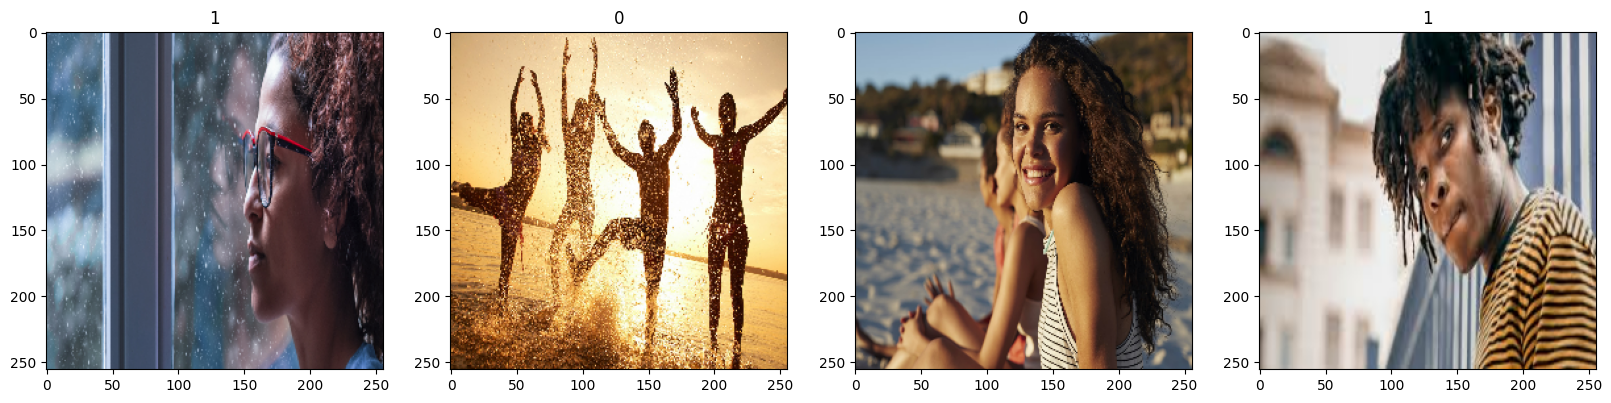

In [32]:
# View images and labels in the batch
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, image in enumerate(batch[0][:4]): # loop through the first 4 images in the batch
    ax[idx].imshow(image.astype(int)) # show image
    ax[idx].set_title(batch[1][idx]) # show label


### 2. Preprocessing Data

 ##### 2.1 Scale: Convert numpy array from 0 - 255 to 0 - 1 => model generalization is faster and better

In [33]:
# images range from 0 - 255
print(batch[0].min(), '-', batch[0].max())

0.0 - 255.0


In [34]:
scaled = batch[0] / 255 # converting into 0 - 1 range
print(scaled.min(), '-', scaled.max())

0.0 - 1.0


In [35]:
# in tensorflow datapipeline
data = data.map(lambda x,y: (x/255, y)) # convert images to 0 - 1 range
# x -> images, y -> labels
# for more function (like map) in tensorflow data pipeline: https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].max() # should be 1

1.0

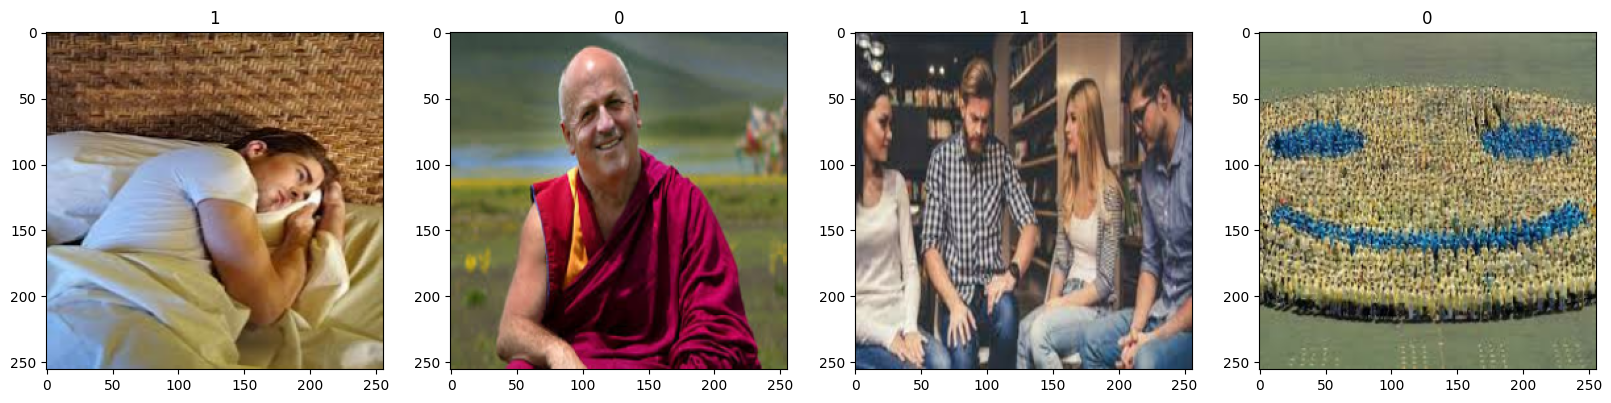

In [36]:
# View images and labels in the batch
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, image in enumerate(batch[0][:4]): # loop through the first 4 images in the batch
    ax[idx].imshow(image) # show image
    ax[idx].set_title(batch[1][idx]) # show label

##### 2.2 Split Data

In [37]:
len(data) #no of batches

18

In [38]:
# training & testing to make sure we don't overfit
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1
print(train_size,'+', val_size,'+', test_size)

12 + 4 + 2


In [39]:
#shuffle before splitting
train = data.take(train_size) # take first 70% of the data
val = data.skip(train_size).take(val_size) # skip first 70% of the data and take next 10% of the data
test = data.skip(train_size+val_size).take(test_size) # skip first 70% of the data and take next 10% of the data
print(len(train))
print(len(val))
print(len(test))


12
4
2


### 3. Deep Learning Model

3.1 Build Model

In [40]:
from tensorflow.keras.models import Sequential # Sequential model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense #, Dropout 
# Conv2D -> Convolutional layer, MaxPool2D -> Max Pooling layer, 
# Flatten -> Flatten layer, Dense -> Dense layer, Dropout -> Dropout layer

In [41]:
model = Sequential() # create sequential model  or Sequential([Conv2D(),])

In [42]:
# first is convolutional layer  w/: 
# # 16 filters, 
# # 3x3 kernel size (pixel size of the filter), 
# # 1 stride (as per model architecture)),
# # relu activation function (produce an ineffective linear model if not added), 
# # input shape (specify input shape for the first layer only)
# # # 256x256x3 (256x256 pixels, 3 channels deep (RGB))
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
# add max pooling layer: 
# # 2x2 kernel size, 2 stride
# # to reduce the size of the image in half
model.add(MaxPool2D()) 

# HIDDEN LAYERS
model.add(Conv2D(32, (3,3), 1, activation='relu')) # add convolutional layer
model.add(MaxPool2D()) # add max pooling layer

model.add(Conv2D(16, (3,3), 1, activation='relu')) # add convolutional layer
model.add(MaxPool2D()) # add max pooling layer

model.add(Flatten()) # add flatten layer

model.add(Dense(256, activation='relu')) # add dense layer
model.add(Dense(1, activation='sigmoid')) # add dense layer


In [43]:
# compile the model
model.compile(optimizer='adam', # adam optimizer for gradient descent
                loss='binary_crossentropy', # binary crossentropy loss function for binaru classification
                metrics=['accuracy']) # accuracy metric for model evaluation

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

3.2 Train

In [45]:
# make sure you have folder logs manually created
logdir = 'logs'

In [46]:
# gives a callback to tensorboard to generate logs 
# # which is useful when training a model like to see the loss and accuracy or change learning rate
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [47]:
# Fitting the model
hist = model.fit(train, # training data
                    epochs=20, # number of epochs (1 epoch is one run over entire training data)
                    validation_data=val, # validation data to evaluate the model
                    callbacks=[tensorboard_callback]) # callback for tensorboard

# look for reduced loss and increased accuracy in the output

Epoch 1/20
12/12 [==============================] - 13s 996ms/step - loss: 0.7370 - accuracy: 0.7891 - val_loss: 0.6193 - val_accuracy: 0.7266
Epoch 2/20
12/12 [==============================] - 12s 951ms/step - loss: 0.5136 - accuracy: 0.7760 - val_loss: 0.5748 - val_accuracy: 0.8125
Epoch 3/20
12/12 [==============================] - 13s 1s/step - loss: 0.4654 - accuracy: 0.7917 - val_loss: 0.4520 - val_accuracy: 0.7656
Epoch 4/20
12/12 [==============================] - 12s 943ms/step - loss: 0.4706 - accuracy: 0.7969 - val_loss: 0.3731 - val_accuracy: 0.8594
Epoch 5/20
12/12 [==============================] - 12s 948ms/step - loss: 0.4175 - accuracy: 0.8177 - val_loss: 0.3517 - val_accuracy: 0.8438
Epoch 6/20
12/12 [==============================] - 12s 937ms/step - loss: 0.3874 - accuracy: 0.8281 - val_loss: 0.2750 - val_accuracy: 0.9062
Epoch 7/20
12/12 [==============================] - 12s 941ms/step - loss: 0.3655 - accuracy: 0.8568 - val_loss: 0.3068 - val_accuracy: 0.8828
Ep

In [48]:
hist.history # loss and accuracy for each epoch

{'loss': [0.7369861602783203,
  0.5135766863822937,
  0.4653777778148651,
  0.47055602073669434,
  0.4174524247646332,
  0.38742145895957947,
  0.36548912525177,
  0.2578444182872772,
  0.23707205057144165,
  0.1855774074792862,
  0.11483573913574219,
  0.08947476744651794,
  0.0742267370223999,
  0.04981270805001259,
  0.07732357084751129,
  0.08630377799272537,
  0.028029559180140495,
  0.017854923382401466,
  0.018048256635665894,
  0.030762342736124992],
 'accuracy': [0.7890625,
  0.7760416865348816,
  0.7916666865348816,
  0.796875,
  0.8177083134651184,
  0.828125,
  0.8567708134651184,
  0.8984375,
  0.9088541865348816,
  0.9348958134651184,
  0.9635416865348816,
  0.9713541865348816,
  0.9791666865348816,
  0.9869791865348816,
  0.9765625,
  0.9765625,
  0.9895833134651184,
  0.9973958134651184,
  0.9973958134651184,
  0.9973958134651184],
 'val_loss': [0.6193373203277588,
  0.5747838020324707,
  0.45201948285102844,
  0.3730617165565491,
  0.35168036818504333,
  0.275026172399

3.3 Plot Performance

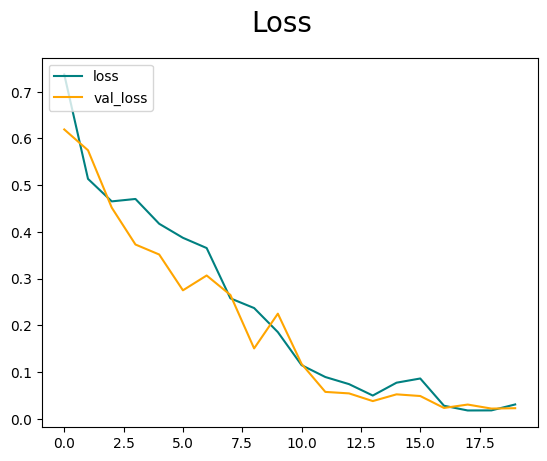

In [49]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#OUTPUT INTERPRETATION:
# if loss is going down but val_loss is going up, then we are overfitting
# solution: apply regularization (dropout, l1, l2) or add more data
# here variance is too high, then we are having a variance problem

# if validation loss is going down but training loss is not going down, then we are underfitting
# look at training data or might need to change to bigger nn architecture
# meaning is not able to learn from the data, then we are having a biasing problem

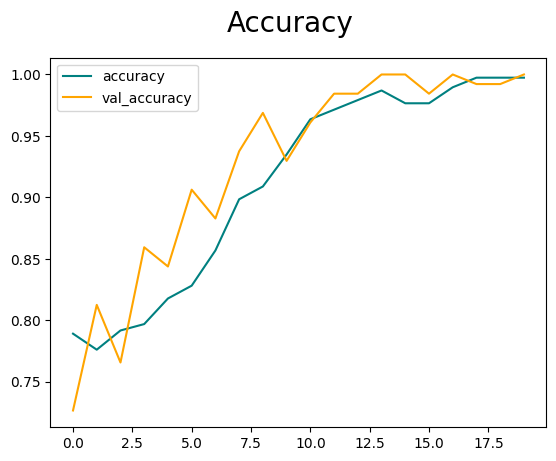

In [50]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 4. Evaluate Performance

4.1 Evaluate: Precision, Recall, Accuracy

In [51]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy # measures for classification problems

In [52]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [53]:
len(test)

2

In [54]:
for batch in test.as_numpy_iterator():
    X, y = batch # X -> images, y -> labels
    yhat = model.predict(X) # predict the labels with sigmoid activation
    pre.update_state(y, yhat) # update the precision
    re.update_state(y, yhat) # update the recall
    acc.update_state(y, yhat) # update the accuracy

1/1 [==============================] - 0s 155ms/step


In [55]:
print(f'Precision: {pre.result().numpy()}') 
print('precision is the ratio of correctly predicted positive observations to the total predicted positive observations')
print('precision = TP/(TP+FP)')
print('-'*50)
print(f'Recall: {re.result().numpy()}')
print('recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes')
print('recall = TP/(TP+FN)')
print('-'*50)
print(f'Accuracy: {acc.result().numpy()}')
print('accuracy is the ratio of correctly predicted observations to the total observations')
print('accuracy = (TP+TN)/(TP+FP+FN+TN)')

Precision: 1.0
precision is the ratio of correctly predicted positive observations to the total predicted positive observations
precision = TP/(TP+FP)
--------------------------------------------------
Recall: 1.0
recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes
recall = TP/(TP+FN)
--------------------------------------------------
Accuracy: 1.0
accuracy is the ratio of correctly predicted observations to the total observations
accuracy = (TP+TN)/(TP+FP+FN+TN)


4.2 Testing

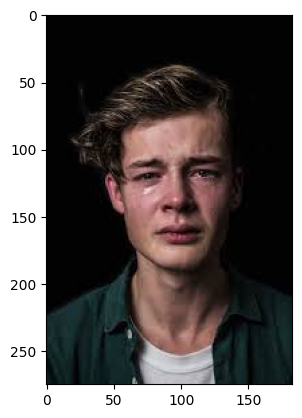

In [56]:
# with new images not in the dataset
sad_img = cv2.imread('sad_test.jpeg')
# plt.imshow(img) #BGR
# In RGB
plt.imshow(cv2.cvtColor(sad_img, cv2.COLOR_BGR2RGB))
plt.show()

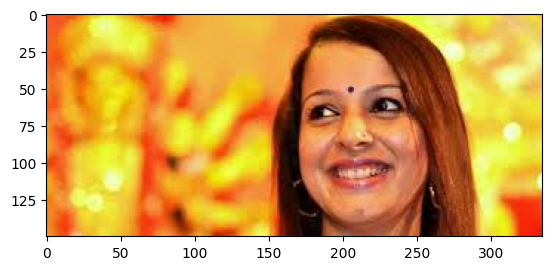

In [57]:
happy_img = cv2.imread('happy_test.jpeg')
# plt.imshow(img) #BGR
# In RGB
plt.imshow(cv2.cvtColor(happy_img, cv2.COLOR_BGR2RGB))
plt.show()

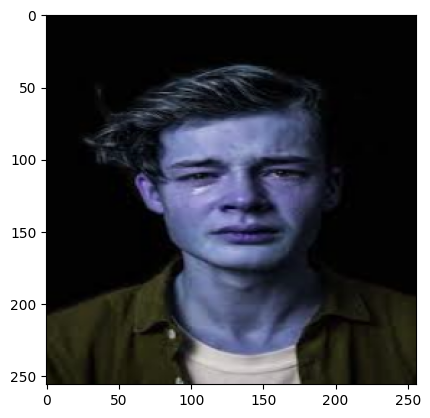

In [58]:
# change to check out happy and sad tests
# convert into 256x256x3
resize = tf.image.resize(sad_img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [59]:
resize.shape

TensorShape([256, 256, 3])

In [60]:
np.expand_dims(resize/255, axis=0).shape

(1, 256, 256, 3)

In [61]:
yhat = model.predict(np.expand_dims(resize/255, axis=0))
# np.expand_dims -> add a dimension to the array
# resize/255 -> normalize the image
# axis=0 -> add a dimension to the first axis

1/1 [==============================] - 0s 38ms/step


In [62]:
yhat

array([[0.8781474]], dtype=float32)

### Out model has successfully predicted the image as:
- rounding down:
    - near 1 is sad
    - near 0 is happy

In [63]:
if yhat > 0.5:
    print('Sad')
else:
    print('Happy')

Sad


## Saving the Model

5.1 Save the Model

In [64]:
from tensorflow.keras.models import load_model

In [65]:
# saved inside model folder (manually created)
model.save(os.path.join('models', 'happysadmodel.h5')) #serialization file format

In [66]:
# reload the model
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [67]:
new_model

In [68]:
yhatnew = new_model.predict(np.expand_dims(resize/255, axis=0))

1/1 [==============================] - 0s 81ms/step


In [69]:
if yhatnew > 0.5:
    print('Sad')
else:
    print('Happy')

Sad


video tutorial: https://www.youtube.com/watch?v=jztwpsIzEGc&t=2867s 